In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/Configurazione2

/content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/Configurazione1


In [3]:
!ls

PNMDTE	PNMDTR


In [10]:
import os
import cv2

#Training

path = '/content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/Configurazione2/PNMDTR/noFight'  
out_path = '/content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/frames2/fTR/noFight'

def video_to_frame(path,out_path):
    i=0
    x=30
    c=0
    for j in os.listdir(path):
        vid_path = os.path.join(path,j)
        
        vidcap = cv2.VideoCapture(vid_path)
        count = 0
        z=0

        while vidcap.isOpened():
            success,image = vidcap.read()
            
            if success == False:
               break
            z+=1
            
        print(z)
        vidcap.release()
        cv2.destroyAllWindows()
        vidcap = cv2.VideoCapture(vid_path)
        
        frame_skip = z/x
        print(frame_skip)

        while vidcap.isOpened():
            success,image = vidcap.read()
            
            if success == False:
               break
           
            c+=1
            if c> frame_skip:
                c=0
                cv2.imwrite(os.path.join(out_path,f"{i}.jpg".format(count)), image)
                count += 1
                i+=1
    
        vidcap.release()
        cv2.destroyAllWindows()

video_to_frame(path, out_path)      

49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
50
1.6666666666666667
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
50
1.6666666666666667
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.6333333333333333
49
1.63333

In [11]:
#Test


path = '/content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/Configurazione2/PNMDTE/noFight'  
out_path = '/content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/frames2/fTE/noFight'

def video_to_frame(path,out_path):
    i=0
    x=30
    c=0
    for j in os.listdir(path):
        vid_path = os.path.join(path,j)
        
        vidcap = cv2.VideoCapture(vid_path)
        count = 0
        z=0

        while vidcap.isOpened():
            success,image = vidcap.read()
            
            if success == False:
               break
            z+=1
            
        print(z)
        vidcap.release()
        cv2.destroyAllWindows()
        vidcap = cv2.VideoCapture(vid_path)
        
        frame_skip = z/x
        print(frame_skip)

        while vidcap.isOpened():
            success,image = vidcap.read()
            
            if success == False:
               break
           
            c+=1
            if c> frame_skip:
                c=0
                cv2.imwrite(os.path.join(out_path,f"{i}.jpg".format(count)), image)
                count += 1
                i+=1
    
        vidcap.release()
        cv2.destroyAllWindows()

video_to_frame(path, out_path) 

1314
43.8
596
19.866666666666667
711
23.7
298
9.933333333333334
347
11.566666666666666
1607
53.56666666666667
1283
42.766666666666666
839
27.966666666666665
169
5.633333333333334
289
9.633333333333333
241
8.033333333333333
313
10.433333333333334
313
10.433333333333334
265
8.833333333333334
217
7.233333333333333
217
7.233333333333333
217
7.233333333333333
217
7.233333333333333
337
11.233333333333333
313
10.433333333333334
593
19.766666666666666
1442
48.06666666666667
376
12.533333333333333
532
17.733333333333334
221
7.366666666666666
1146
38.2
829
27.633333333333333
811
27.033333333333335
1221
40.7
544
18.133333333333333
639
21.3


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [15]:
PATH1 = '/content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/frames2/fTR'
PATH2 = '/content/drive/My Drive/DatasetsI/4.P+NMD/Divisione70%30%/frames2/fTE'

In [16]:

#train_dir = os.path.join(PATH, 'fights')
#validation_dir = os.path.join(PATH, 'nofights')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(PATH1,
                                             validation_split = 0.2, #percentuale validation
                                             subset = "training", #indico parte restante della divisione che questa è training
                                             seed = 123, #se non lo metto mischia split training e validation
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 3233 files belonging to 2 classes.
Using 2587 files for training.


In [17]:
validation_dataset = image_dataset_from_directory(PATH1,
                                                  validation_split = 0.2, #percentuale validation
                                                  subset = "validation", #indico parte restante della divisione che questa è training
                                                  seed = 123, #se non lo metto mischia split training e validation
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 3233 files belonging to 2 classes.
Using 646 files for validation.


In [18]:
test_dataset = image_dataset_from_directory(PATH2,
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE)

Found 1797 files belonging to 2 classes.


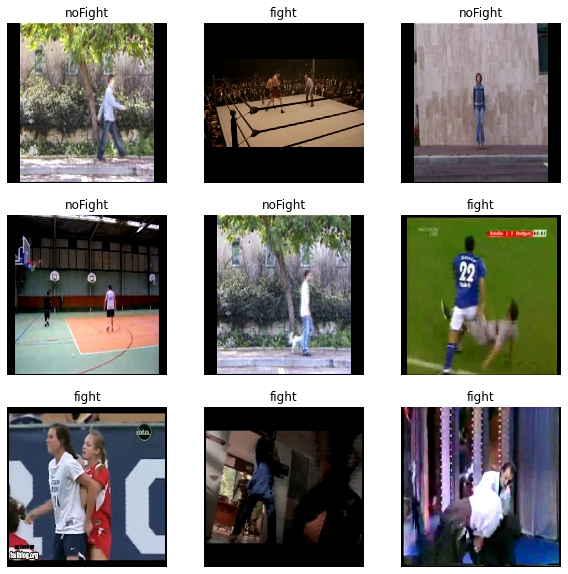

In [19]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
#test_dataset = validation_dataset.take(val_batches // 5)
#validation_dataset = validation_dataset.skip(val_batches // 5)

In [21]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 21
Number of test batches: 57


In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [23]:
#serve solo per avere più img per veriarle di specchio
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
#preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [25]:
#rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [26]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
#pesi con img o senza niente(non alleno nulla cos'), oppure gaussiana

87916544/87910968 [==============================] - 0s 0us/step


In [27]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 3, 3, 2048)


In [28]:
base_model.trainable = False
#no layer prefatti, bloccati

In [29]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 79, 79, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 79, 79, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [30]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [31]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [32]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [33]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0     

In [35]:
len(model.trainable_variables)

2

In [36]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

21/21 [==============================] - 5s 93ms/step - loss: 0.9459 - accuracy: 0.3893


In [37]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.94
initial accuracy: 0.39


In [38]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
81/81 [==============================] - 17s 152ms/step - loss: 0.7766 - accuracy: 0.5640 - val_loss: 0.7299 - val_accuracy: 0.5031
Epoch 2/10
81/81 [==============================] - 13s 149ms/step - loss: 0.5430 - accuracy: 0.7155 - val_loss: 0.6036 - val_accuracy: 0.5929
Epoch 3/10
81/81 [==============================] - 13s 147ms/step - loss: 0.4143 - accuracy: 0.7909 - val_loss: 0.5200 - val_accuracy: 0.6563
Epoch 4/10
81/81 [==============================] - 13s 146ms/step - loss: 0.3359 - accuracy: 0.8392 - val_loss: 0.4647 - val_accuracy: 0.6950
Epoch 5/10
81/81 [==============================] - 13s 148ms/step - loss: 0.2874 - accuracy: 0.8782 - val_loss: 0.4391 - val_accuracy: 0.7368
Epoch 6/10
81/81 [==============================] - 13s 146ms/step - loss: 0.2466 - accuracy: 0.8937 - val_loss: 0.3950 - val_accuracy: 0.7848
Epoch 7/10
81/81 [==============================] - 13s 148ms/step - loss: 0.2245 - accuracy: 0.9018 - val_loss: 0.3675 - val_accuracy: 0.8111

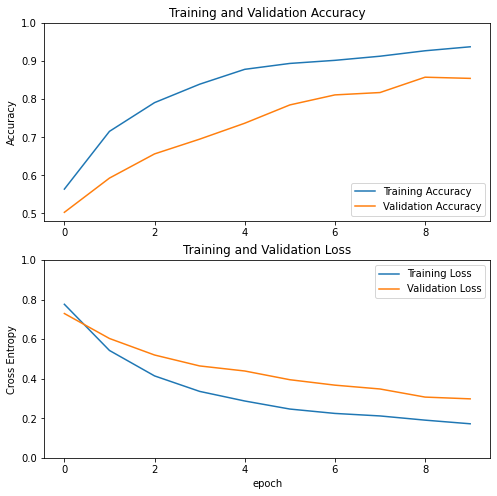

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [40]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

57/57 [==============================] - 6s 96ms/step - loss: 0.3442 - accuracy: 0.8420
Test accuracy : 0.8419588208198547


Predictions:
 [1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0]
Labels:
 [0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0]


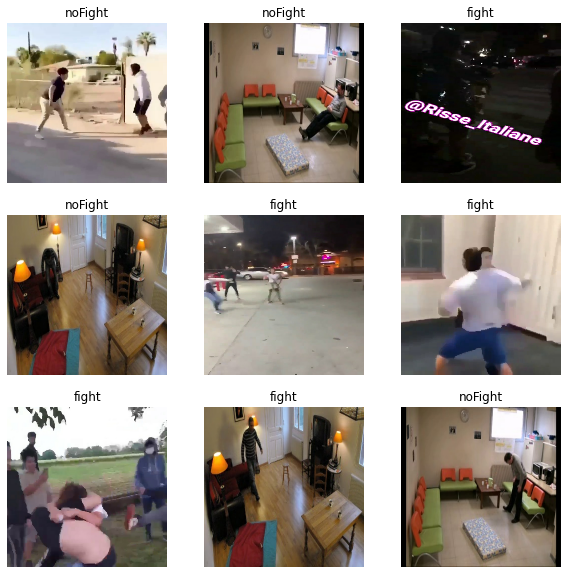

In [41]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Normalized confusion matrix
[[0.74 0.26]
 [0.31 0.69]]


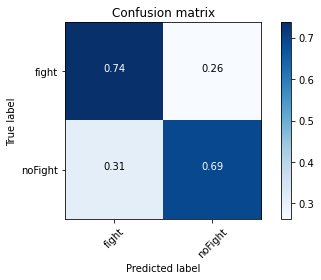

In [42]:
from sklearn.metrics import confusion_matrix
from torch.autograd import Variable

import itertools
import numpy as np
import matplotlib.pyplot as plt


x=predictions.numpy()
y=label_batch

def plot_confusion_matrix(cm, class_names,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(x, y)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names,
                      title='Confusion matrix')



In [43]:
from sklearn.metrics import classification_report
print(classification_report(x, y, target_names=class_names))

              precision    recall  f1-score   support

       fight       0.78      0.74      0.76        19
     noFight       0.64      0.69      0.67        13

    accuracy                           0.72        32
   macro avg       0.71      0.71      0.71        32
weighted avg       0.72      0.72      0.72        32

